# Projet Data Science

## Initialisation du projet

In [1]:
import pandas as pd
import numpy as np
import datetime
from datetime import time

In [2]:
dataset = pd.read_csv('mails.csv',dtype={"content": str},low_memory=False)

In [3]:
dataset.shape

(100000, 52)

On a 100 000 mails

## Nettoyage des données

### Suppression des colonnes nulles ou non pertinentes

In [4]:
dataset.head()

,Unnamed: 0,Message-ID,Date,From,To,Subject,X-From,X-To,X-cc,X-bcc,...,Cat_10_level_1,Cat_10_level_2,Cat_10_weight,Cat_11_level_1,Cat_11_level_2,Cat_11_weight,Cat_12_level_1,Cat_12_level_2,Cat_12_weight,labeled
0,0,<18782981.1075855378110.JavaMail.evans@thyme>,2001-05-14 23:39:00,frozenset({'phillip.allen@enron.com'}),frozenset({'tim.belden@enron.com'}),NaN,Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,1,<15464986.1075855378456.JavaMail.evans@thyme>,2001-05-04 20:51:00,frozenset({'phillip.allen@enron.com'}),frozenset({'john.lavorato@enron.com'}),Re:,Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,2,<24216240.1075855687451.JavaMail.evans@thyme>,2000-10-18 10:00:00,frozenset({'phillip.allen@enron.com'}),frozenset({'leah.arsdall@enron.com'}),Re: test,Phillip K Allen,Leah Van Arsdall,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,3,<13505866.1075863688222.JavaMail.evans@thyme>,2000-10-23 13:13:00,frozenset({'phillip.allen@enron.com'}),frozenset({'randall.gay@enron.com'}),NaN,Phillip K Allen,Randall L Gay,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,4,<30922949.1075863688243.JavaMail.evans@thyme>,2000-08-31 12:07:00,frozenset({'phillip.allen@enron.com'}),frozenset({'greg.piper@enron.com'}),Re: Hello,Phillip K Allen,Greg Piper,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [5]:
dataset.columns

Index(['Unnamed: 0', 'Message-ID', 'Date', 'From', 'To', 'Subject', 'X-From',
       'X-To', 'X-cc', 'X-bcc', 'X-Folder', 'X-Origin', 'X-FileName',
       'content', 'user', 'Cat_1_level_1', 'Cat_1_level_2', 'Cat_1_weight',
       'Cat_2_level_1', 'Cat_2_level_2', 'Cat_2_weight', 'Cat_3_level_1',
       'Cat_3_level_2', 'Cat_3_weight', 'Cat_4_level_1', 'Cat_4_level_2',
       'Cat_4_weight', 'Cat_5_level_1', 'Cat_5_level_2', 'Cat_5_weight',
       'Cat_6_level_1', 'Cat_6_level_2', 'Cat_6_weight', 'Cat_7_level_1',
       'Cat_7_level_2', 'Cat_7_weight', 'Cat_8_level_1', 'Cat_8_level_2',
       'Cat_8_weight', 'Cat_9_level_1', 'Cat_9_level_2', 'Cat_9_weight',
       'Cat_10_level_1', 'Cat_10_level_2', 'Cat_10_weight', 'Cat_11_level_1',
       'Cat_11_level_2', 'Cat_11_weight', 'Cat_12_level_1', 'Cat_12_level_2',
       'Cat_12_weight', 'labeled'],
      dtype='object')

In [6]:
test = dataset[['Cat_1_level_1', 'Cat_1_level_2', 'Cat_1_weight', 'Cat_2_level_1',
       'Cat_2_level_2', 'Cat_2_weight', 'Cat_3_level_1', 'Cat_3_level_2',
       'Cat_3_weight', 'Cat_4_level_1', 'Cat_4_level_2', 'Cat_4_weight',
       'Cat_5_level_1', 'Cat_5_level_2', 'Cat_5_weight', 'Cat_6_level_1',
       'Cat_6_level_2', 'Cat_6_weight', 'Cat_7_level_1', 'Cat_7_level_2',
       'Cat_7_weight', 'Cat_8_level_1', 'Cat_8_level_2', 'Cat_8_weight',
       'Cat_9_level_1', 'Cat_9_level_2', 'Cat_9_weight', 'Cat_10_level_1',
       'Cat_10_level_2', 'Cat_10_weight', 'Cat_11_level_1', 'Cat_11_level_2',
       'Cat_11_weight', 'Cat_12_level_1', 'Cat_12_level_2', 'Cat_12_weight']]

In [7]:
test.isna().sum()

Cat_1_level_1      99790
Cat_1_level_2      99790
Cat_1_weight       99790
Cat_2_level_1      99800
Cat_2_level_2      99800
Cat_2_weight       99800
Cat_3_level_1      99834
Cat_3_level_2      99834
Cat_3_weight       99834
Cat_4_level_1      99896
Cat_4_level_2      99896
Cat_4_weight       99896
Cat_5_level_1      99943
Cat_5_level_2      99943
Cat_5_weight       99943
Cat_6_level_1      99979
Cat_6_level_2      99979
Cat_6_weight       99979
Cat_7_level_1      99990
Cat_7_level_2      99990
Cat_7_weight       99990
Cat_8_level_1      99998
Cat_8_level_2      99998
Cat_8_weight       99998
Cat_9_level_1      99999
Cat_9_level_2      99999
Cat_9_weight       99999
Cat_10_level_1     99999
Cat_10_level_2     99999
Cat_10_weight      99999
Cat_11_level_1    100000
Cat_11_level_2    100000
Cat_11_weight     100000
Cat_12_level_1    100000
Cat_12_level_2    100000
Cat_12_weight     100000
dtype: int64

In [8]:
dataset.drop(['Cat_1_level_1', 'Cat_1_level_2', 'Cat_1_weight', 'Cat_2_level_1',
       'Cat_2_level_2', 'Cat_2_weight', 'Cat_3_level_1', 'Cat_3_level_2',
       'Cat_3_weight', 'Cat_4_level_1', 'Cat_4_level_2', 'Cat_4_weight',
       'Cat_5_level_1', 'Cat_5_level_2', 'Cat_5_weight', 'Cat_6_level_1',
       'Cat_6_level_2', 'Cat_6_weight', 'Cat_7_level_1', 'Cat_7_level_2',
       'Cat_7_weight', 'Cat_8_level_1', 'Cat_8_level_2', 'Cat_8_weight',
       'Cat_9_level_1', 'Cat_9_level_2', 'Cat_9_weight', 'Cat_10_level_1',
       'Cat_10_level_2', 'Cat_10_weight', 'Cat_11_level_1', 'Cat_11_level_2','Cat_11_weight', 'Cat_12_level_1', 'Cat_12_level_2', 'Cat_12_weight'], axis = 1, inplace = True)

In [9]:
dataset.drop(['X-From', 'X-To', 'X-FileName', 'X-FileName', 'Unnamed: 0'], axis = 1, inplace = True)

In [10]:
test[test['Cat_1_level_1'].isna()==False]

,Cat_1_level_1,Cat_1_level_2,Cat_1_weight,Cat_2_level_1,Cat_2_level_2,Cat_2_weight,Cat_3_level_1,Cat_3_level_2,Cat_3_weight,Cat_4_level_1,...,Cat_9_weight,Cat_10_level_1,Cat_10_level_2,Cat_10_weight,Cat_11_level_1,Cat_11_level_2,Cat_11_weight,Cat_12_level_1,Cat_12_level_2,Cat_12_weight
379,1.0,1.0,2.0,3.0,8.0,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
381,1.0,3.0,2.0,4.0,10.0,2.0,4.0,11.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2139,1.0,4.0,1.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2140,1.0,4.0,1.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2232,1.0,4.0,1.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84186,1.0,1.0,2.0,1.0,3.0,2.0,2.0,1.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89217,1.0,1.0,2.0,1.0,6.0,2.0,2.0,3.0,2.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89301,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89920,1.0,6.0,2.0,1.0,7.0,2.0,2.0,7.0,2.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# nombre de mail ou il n'y a pas de bcc
dataset['X-bcc'].isna().sum()

99966

Au vue du nombre important de donnée nulle, on peut considérer la suppression de la colonne

### Nettoyage colonne From et To

In [12]:
#From
for i in range(len(dataset.From)):
    dataset.From[i] = str(dataset.From[i])[11:-2]

#To
for i in range(len(dataset.To)):
    dataset.To[i] = str(dataset.To[i])[11:-2]

<ipython-input-12-38aace425442>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.From[i] = str(dataset.From[i])[11:-2]
<ipython-input-12-38aace425442>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.To[i] = str(dataset.To[i])[11:-2]


### Nettoyage colonne Date

In [13]:
dataset['Date'] = pd.to_datetime(dataset['Date'], format='%Y-%m-%d %H:%M:%S.%f')

## Manipulation des données

### Taille du contenu du mail

In [14]:
#Calcul de la longueur du contenu en nombre de caractère
dataset['content_size'] = dataset['content'].apply(lambda x: len(str(x)))

### Taille du sujet du mail

In [15]:
#Calcul de la longueur du sujet en nombre de caractère
dataset['subject_size'] = dataset['Subject'].apply(lambda x: 0 if 'nan' in str(x).lower() else len(str(x)))

### Mail transmit

In [16]:
#Mail transmit     
dataset['forwarded_mail'] = dataset['content'].apply(lambda x: 1 if '---------------------- forwarded by' in str(x).lower() else 0)

##### Directement transmit

In [17]:
#Mail directement transmit ou non
def mail_directement_transmit (content) :
    res = content.split()
    if ('----------------------' in res[0].lower() and 'forwarded' in res[1].lower() and 'by' in res[2].lower()):
        return 1
    else :
        return 0

#Création des colonnes dans le dataframe
dataset['mail_direct_forwarded']=0

for i in range(len(dataset)):
    dataset['mail_direct_forwarded'][i] = mail_directement_transmit(str(dataset['content'][i]))

<ipython-input-17-13187cd85297>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['mail_direct_forwarded'][i] = mail_directement_transmit(str(dataset['content'][i]))


##### Transmit avec commentaire

In [18]:
#Mail transmit avec un commentaire
def mail_transmit_avec_commentaire (content) :
    if '---------------------- forwarded by' in str(content).lower():
        msg=''
        res = content.split()
        for i in range(3):
            msg += res[i] 
        if '---------------------- forwarded by' not in msg:
            return 1
        else : 
            return 0
    else:
        return 0

dataset['mail_transmit_avec_commentaire'] =0

for i in range(len(dataset)):
    dataset['mail_transmit_avec_commentaire'][i] = mail_transmit_avec_commentaire(str(dataset['content'][i]))

<ipython-input-18-5d86b3b2430d>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['mail_transmit_avec_commentaire'][i] = mail_transmit_avec_commentaire(str(dataset['content'][i]))


In [19]:
dataset[dataset['forwarded_mail']==1]

,Message-ID,Date,From,To,Subject,X-cc,X-bcc,X-Folder,X-Origin,content,user,labeled,content_size,subject_size,forwarded_mail,mail_direct_forwarded,mail_transmit_avec_commentaire
9,<30795301.1075855687494.JavaMail.evans@thyme>,2000-10-16 13:44:00,'phillip.allen@enron.com','zimam@enron.com',FW: fixed forward or other Collar floor gas pr...,NaN,NaN,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,---------------------- Forwarded by Phillip K ...,allen-p,False,2080,55,1,1,1
12,<13116875.1075855687561.JavaMail.evans@thyme>,2000-10-09 14:16:00,'phillip.allen@enron.com','keith.holst@enron.com',Consolidated positions: Issues & To Do list,NaN,NaN,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,---------------------- Forwarded by Phillip K ...,allen-p,False,5604,43,1,1,1
13,<2707340.1075855687584.JavaMail.evans@thyme>,2000-10-09 14:00:00,'phillip.allen@enron.com','keith.holst@enron.com',Consolidated positions: Issues & To Do list,NaN,NaN,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,---------------------- Forwarded by Phillip K ...,allen-p,False,5604,43,1,1,1
16,<19773657.1075855687649.JavaMail.evans@thyme>,2000-10-04 16:23:00,'phillip.allen@enron.com','ina.rangel@enron.com',"Var, Reporting and Resources Meeting",NaN,NaN,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,---------------------- Forwarded by Phillip K ...,allen-p,False,854,36,1,1,1
18,<12759088.1075855687671.JavaMail.evans@thyme>,2000-10-03 16:30:00,'phillip.allen@enron.com','pallen70@hotmail.com',Westgate,NaN,NaN,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,---------------------- Forwarded by Phillip K ...,allen-p,False,1701,8,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99992,<16847489.1075840439082.JavaMail.evans@thyme>,2001-03-14 23:30:00,'daren.farmer@enron.com','aimee.lannou@enron.com',Re: deal 34342,NaN,NaN,"\ExMerge - Farmer, Darren\'Sent Mail",FARMER-D,We have a buyback under HPL (#586534). ENA had...,farmer-d,False,1880,14,1,0,1
99993,<30208772.1075854174165.JavaMail.evans@thyme>,1999-12-27 16:16:00,'daren.farmer@enron.com','carlos.rodriguez@enron.com',Unify Close Schedule,NaN,NaN,\Darren_Farmer_Dec2000\Notes Folders\'sent mail,Farmer-D,---------------------- Forwarded by Daren J Fa...,farmer-d,False,1935,20,1,1,1
99994,<6729839.1075854174187.JavaMail.evans@thyme>,1999-12-27 12:35:00,'daren.farmer@enron.com',"'pat.clynes@enron.com', 'ami.chokshi@enron.com...",displaying 4 digit year on your desktop,NaN,NaN,\Darren_Farmer_Dec2000\Notes Folders\'sent mail,Farmer-D,---------------------- Forwarded by Daren J Fa...,farmer-d,False,1320,39,1,1,1
99995,<29980890.1075854174209.JavaMail.evans@thyme>,1999-12-27 08:11:00,'daren.farmer@enron.com','carlos.rodriguez@enron.com',January Production Estimate,NaN,NaN,\Darren_Farmer_Dec2000\Notes Folders\'sent mail,Farmer-D,---------------------- Forwarded by Daren J Fa...,farmer-d,False,1367,27,1,1,1


### Nombre de cc

In [20]:
# nombre de mail ou il n'y a pas de cc
dataset['X-cc'].isna().sum()

78253

In [21]:
#Nombre de cc
def nb_cc (content):
    if str(content).lower() == 'nan':
        return 0
    else:
        return len(content.split(','))

dataset['nb_cc'] = 0

for i in range(len(dataset)):
    dataset['nb_cc'][i] = nb_cc(dataset['X-cc'][i])

<ipython-input-21-d85ff2425381>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['nb_cc'][i] = nb_cc(dataset['X-cc'][i])


### Mail automatique

In [22]:
#mail auo
mailAuto = dataset[dataset['content'].str.contains("<!--")==True]
#mailAuto = dataset[dataset['content'].str.contains("html")==True]
mailAuto['content']

1457     <HTML> <HEAD> <TITLE>Web Vixens</TITLE> <META ...
1483     <!--[core.text]--> _____________________DAVID ...
1566     <!--To put this html into an existing HTML doc...
2012     <!-- A SPECIAL OFFER brought to you by CBS Spo...
5257     <head> <title>WineISIT.com - Member E-mail</ti...
                               ...                        
94809    <! > <! > <! ATTENTION!> <! You are reading th...
94823    <!DOCTYPE -//w3c//dtd 4.0 html public transiti...
95648    <IFRAME src="http://WWW.ENERFAX.com" width=700...
96747    --------------sAAbXVADA=01 Content-type: text/...
96764    --------------sAAbXVADA=01 Content-type: text/...
Name: content, Length: 272, dtype: object

In [23]:
dataset.head()

,Message-ID,Date,From,To,Subject,X-cc,X-bcc,X-Folder,X-Origin,content,user,labeled,content_size,subject_size,forwarded_mail,mail_direct_forwarded,mail_transmit_avec_commentaire,nb_cc
0,<18782981.1075855378110.JavaMail.evans@thyme>,2001-05-14 23:39:00,'phillip.allen@enron.com','tim.belden@enron.com',NaN,NaN,NaN,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,Here is our forecast,allen-p,False,20,0,0,0,0,0
1,<15464986.1075855378456.JavaMail.evans@thyme>,2001-05-04 20:51:00,'phillip.allen@enron.com','john.lavorato@enron.com',Re:,NaN,NaN,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,Traveling to have a business meeting takes the...,allen-p,False,773,3,0,0,0,0
2,<24216240.1075855687451.JavaMail.evans@thyme>,2000-10-18 10:00:00,'phillip.allen@enron.com','leah.arsdall@enron.com',Re: test,NaN,NaN,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,test successful. way to go!!!,allen-p,False,29,8,0,0,0,0
3,<13505866.1075863688222.JavaMail.evans@thyme>,2000-10-23 13:13:00,'phillip.allen@enron.com','randall.gay@enron.com',NaN,NaN,NaN,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,"Randy, Can you send me a schedule of the salar...",allen-p,False,180,0,0,0,0,0
4,<30922949.1075863688243.JavaMail.evans@thyme>,2000-08-31 12:07:00,'phillip.allen@enron.com','greg.piper@enron.com',Re: Hello,NaN,NaN,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,Let's shoot for Tuesday at 11:45.,allen-p,False,33,9,0,0,0,0


### Nombre de mail par jour

In [24]:
from collections import Counter

dates = []

for num in range(len(dataset)):
    dates.append(dataset['Date'][num])

dates_count = Counter(dates)

In [25]:
df = pd.DataFrame.from_dict(dates_count, orient='index').reset_index()
df.columns = ['datetime','count']

In [26]:
df['date']=df['datetime'].map(lambda x : x.date())

In [27]:
df.head(10)

,datetime,count,date
0,2001-05-14 23:39:00,2,2001-05-14
1,2001-05-04 20:51:00,2,2001-05-04
2,2000-10-18 10:00:00,3,2000-10-18
3,2000-10-23 13:13:00,4,2000-10-23
4,2000-08-31 12:07:00,3,2000-08-31
5,2000-08-31 11:17:00,5,2000-08-31
6,2000-08-22 14:44:00,4,2000-08-22
7,2000-07-14 13:59:00,3,2000-07-14
8,2000-10-17 09:26:00,3,2000-10-17
9,2000-10-16 13:44:00,4,2000-10-16


### Données dans un intervalle de temps

In [28]:
pivot = df.pivot_table(index='date', values='count', aggfunc='sum').reset_index()
pivot = pivot[(pivot['date']>pd.datetime(2000,1,1).date()) & (pivot['date'] < pd.datetime(2002,6,30).date())]
pivot['date'] = pd.to_datetime(pivot['date']) 

<ipython-input-28-37c5082fffb3>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pivot = pivot[(pivot['date']>pd.datetime(2000,1,1).date()) & (pivot['date'] < pd.datetime(2002,6,30).date())]


In [29]:
import altair as alt

alt.Chart(pivot).mark_bar().encode(
    x='date',
    y='count',
    tooltip=['date','count'],
).properties(width=800)

alt.Chart(...)

### Dimension temps

##### Heure

In [30]:
dataset['Hour'] = dataset['Date'].apply(lambda x: x.hour)

##### Jour

In [31]:
dataset['Day'] = dataset['Date'].apply(lambda x: x.day)

##### Mois

In [32]:
dataset['Month'] = dataset['Date'].apply(lambda x: x.month)

##### Année

In [33]:
dataset['Year'] = dataset['Date'].apply(lambda x: x.year)

##### Moment de la journée

In [34]:
def moment_of_the_day(dataset):
    dataset["Moment"] = None
    for i in range(len(dataset.Date)):
        hour = int(dataset.Date[i].hour)
        if(hour >= 6 and hour < 12):
            dataset["Moment"][i] = "morning"
        if(hour >= 12 and hour < 18):
            dataset["Moment"][i] = "afternoon"
        if(hour >= 18 and hour < 24):
            dataset["Moment"][i] = "evening"
        if(hour >= 0 and hour < 6):
            dataset["Moment"][i] = "night"

moment_of_the_day(dataset)

<ipython-input-34-23737d490466>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Moment"][i] = "evening"
<ipython-input-34-23737d490466>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Moment"][i] = "morning"
<ipython-input-34-23737d490466>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Moment"][i] = "afternoon"
<ipython-input-34-23737d490466>:12: SettingWithCopyWarning: 
A value is trying to be set on a 

### Mail de réunion

In [35]:
def meeting (dataset):
    dataset["content"] = dataset["content"].astype(str)
    dataset["Subject"] = dataset["Subject"].astype(str)
    dataset["Meetings"] = None
    for i in range(len(dataset.content)):
        if ((dataset.content[i].lower().find("meeting") != -1) or (dataset.Subject[i].lower().find("meeting") != -1) or (dataset.content[i].lower().find("meetings") != -1) or (dataset.Subject[i].lower().find("meetings") != -1) or (dataset.Subject[i].lower().find("meeting") != -1) or (dataset.content[i].lower().find("appointment") != -1) or (dataset.Subject[i].lower().find("appointment") != -1)):
            dataset["Meetings"][i] = "True"
        else :
            dataset["Meetings"][i] = "False"
meeting(dataset)

<ipython-input-35-2294c3227bfe>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Meetings"][i] = "False"
<ipython-input-35-2294c3227bfe>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Meetings"][i] = "True"


### Mail important

In [36]:
def important(dataset):
    dataset["Important"] = None
    for i in range(len(dataset.content)):
        if ((dataset.content[i].lower().find("urgent") != -1) or (dataset.Subject[i].lower().find("urgent") != -1) or (dataset.content[i].lower().find("important") != -1) or (dataset.Subject[i].lower().find("important") != -1) or (dataset.content[i].lower().find("quickly") != -1) or (dataset.Subject[i].lower().find("quickly") != -1)):
            dataset["Important"][i] = "True"
        else :
            dataset["Important"][i] = "False"
important(dataset)

<ipython-input-36-7cdb0a484db8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Important"][i] = "False"
<ipython-input-36-7cdb0a484db8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Important"][i] = "True"


In [37]:
nb_important = 0
nb_meeting = 0

for i in range(len(dataset)):
    if dataset.Important[i] == "True":
        nb_important += 1
    if dataset.Meetings[i] == "True":
        nb_meeting += 1
print("Nombre de mails important : ",nb_important,"\nNombre de mails pour reunions : ",nb_meeting)

Nombre de mails important :  7918 
Nombre de mails pour reunions :  17456


In [38]:
print(dataset)

                                          Message-ID                Date  \
0      <18782981.1075855378110.JavaMail.evans@thyme> 2001-05-14 23:39:00   
1      <15464986.1075855378456.JavaMail.evans@thyme> 2001-05-04 20:51:00   
2      <24216240.1075855687451.JavaMail.evans@thyme> 2000-10-18 10:00:00   
3      <13505866.1075863688222.JavaMail.evans@thyme> 2000-10-23 13:13:00   
4      <30922949.1075863688243.JavaMail.evans@thyme> 2000-08-31 12:07:00   
...                                              ...                 ...   
99995  <29980890.1075854174209.JavaMail.evans@thyme> 1999-12-27 08:11:00   
99996   <1928351.1075854174230.JavaMail.evans@thyme> 1999-12-22 07:14:00   
99997  <29784936.1075854174252.JavaMail.evans@thyme> 1999-12-22 07:02:00   
99998  <30410887.1075854174274.JavaMail.evans@thyme> 1999-12-22 06:52:00   
99999  <14676125.1075854174296.JavaMail.evans@thyme> 1999-12-20 16:05:00   

                            From                            To  \
0      'phillip.allen

## Analyse des données

In [39]:
dataset.head()

,Message-ID,Date,From,To,Subject,X-cc,X-bcc,X-Folder,X-Origin,content,...,mail_direct_forwarded,mail_transmit_avec_commentaire,nb_cc,Hour,Day,Month,Year,Moment,Meetings,Important
0,<18782981.1075855378110.JavaMail.evans@thyme>,2001-05-14 23:39:00,'phillip.allen@enron.com','tim.belden@enron.com',nan,NaN,NaN,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,Here is our forecast,...,0,0,0,23,14,5,2001,evening,False,False
1,<15464986.1075855378456.JavaMail.evans@thyme>,2001-05-04 20:51:00,'phillip.allen@enron.com','john.lavorato@enron.com',Re:,NaN,NaN,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,Traveling to have a business meeting takes the...,...,0,0,0,20,4,5,2001,evening,True,False
2,<24216240.1075855687451.JavaMail.evans@thyme>,2000-10-18 10:00:00,'phillip.allen@enron.com','leah.arsdall@enron.com',Re: test,NaN,NaN,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,test successful. way to go!!!,...,0,0,0,10,18,10,2000,morning,False,False
3,<13505866.1075863688222.JavaMail.evans@thyme>,2000-10-23 13:13:00,'phillip.allen@enron.com','randall.gay@enron.com',nan,NaN,NaN,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,"Randy, Can you send me a schedule of the salar...",...,0,0,0,13,23,10,2000,afternoon,False,False
4,<30922949.1075863688243.JavaMail.evans@thyme>,2000-08-31 12:07:00,'phillip.allen@enron.com','greg.piper@enron.com',Re: Hello,NaN,NaN,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,Let's shoot for Tuesday at 11:45.,...,0,0,0,12,31,8,2000,afternoon,False,False


In [ ]:
dataset_anova1 = dataset[['content_size','subject_size','Moment']]
dataset_anova1_1 = dataset[['content_size','Moment']]
dataset_anova1_2 = dataset[['subject_size','Moment']]

In [ ]:
dataset_anova1.to_csv('/Users/pierreperrin/Desktop/IG4/semestre7/Projet_DataScience/anova1.csv', index=False)
dataset_anova1_1.to_csv('/Users/pierreperrin/Desktop/IG4/semestre7/Projet_DataScience/anova1_1.csv', index=False)
dataset_anova1_2.to_csv('/Users/pierreperrin/Desktop/IG4/semestre7/Projet_DataScience/anova1_2.csv', index=False)

anova1_1 facteur content_size et moment
le moment de la journée suivant lequel on envoit le mail influe sur la taille du mail -> afc pour voir le lien entre le moment de la journée et la taille (gros, petit, moyen)

anova1_2 facteur subject_size et moment

In [49]:
m_morning = 0
m_afternoon = 0
m_evening = 0
m_night = 0
nb_morning = 0
nb_afternoon = 0
nb_evening = 0
nb_night = 0

for i in range(len(dataset)):
    if dataset.Moment[i] == "morning":
        m_morning += 1
        nb_morning += dataset.content_size[i]
    elif dataset.Moment[i] == "afternoon":
        m_afternoon += 1
        nb_afternoon += dataset.content_size[i]
    elif dataset.Moment[i] == "evening":
        m_evening += 1
        nb_evening += dataset.content_size[i]
    elif dataset.Moment[i] == "night":
        m_night += 1
        nb_night += dataset.content_size[i]
m_morning = nb_morning/m_morning
m_afternoon = nb_afternoon/m_afternoon
m_evening = nb_evening/m_evening
m_night = nb_night/m_night
    
print("Longueur moyenne : \n Le matin : ",m_morning," \n L'apres midi : ",m_afternoon,"\n Le soir : ",m_evening,"\n La nuit : ",m_night)

Longueur moyenne : 
 Le matin :  3096.008356655761  
 L'apres midi :  1816.2202328671485 
 Le soir :  1792.5379520520114 
 La nuit :  2241.311498754005


### Etude de correlation entre content_size et Important

In [140]:
datasetCI = dataset[['content_size', 'Important']]

somme = 0
for i in range(len(datasetCI)):
    somme += datasetCI.content_size[i]
moyenne = somme/len(datasetCI)

print("Taille moyenne d'un mail :",moyenne)

somme = 0
print(len(datasetCI))
for i in range(len(datasetCI)):
    if(datasetCI.content_size[i] > moyenne+moyenne/2):
        somme += 1
        datasetCI = datasetCI.drop(i)
print("On supprime les grands extremes du nombre de : ",somme)


Taille moyenne d'un mail : 2158.9431
100000
On supprime les grands extremes du nombre de :  13758


#### Anova à un facteur

In [136]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('content_size ~ C(Important)', data=datasetCI).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(Important),2.155007e+09,1.0,3678.808558,0.0
Residual,5.051848e+10,86240.0,NaN,NaN


##### Interprétation des résultats

TODO

#### Vérification de l'hypothèse

##### Test de Shapiro-Wilk

L'hypothèse de normalité est testée sur les résidus du modèle lorsqu'il provient d'une ANOVA ou d'un cadre de régression. Une méthode pour tester l'hypothèse de normalité est le test de Shapiro-Wilk.

In [43]:
import scipy.stats as stats

stats.shapiro(model.resid)

NameError: name 'model' is not defined

##### Methode de vérification visuelle

Méthode de vérification visuelle de la distribution consiste à utiliser un diagramme de probabilité avec ou sans valeur de corrélation, 
pour évaluer la corrélation des valeurs observées avec la distribution théorique en question.

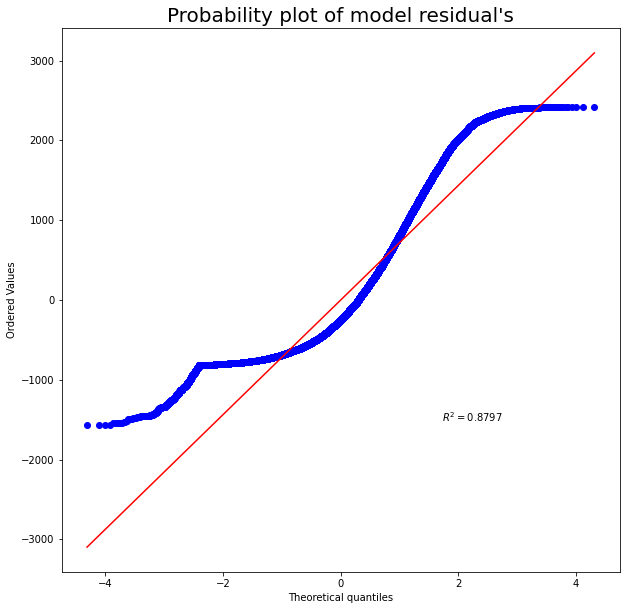

In [138]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(model.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

##### Homogenéité de la variance

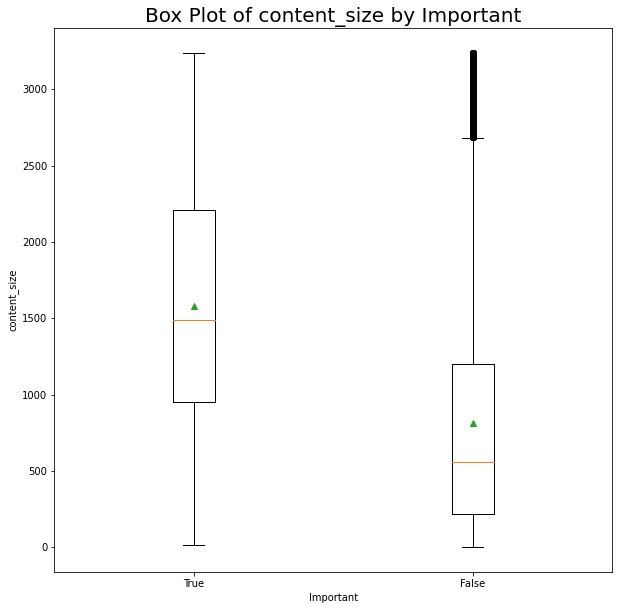

In [139]:
stats.levene(datasetCI['content_size'][datasetCI['Important'] == 'True'],
             datasetCI['content_size'][datasetCI['Important'] == 'False'])

fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of content_size by Important", fontsize= 20)
ax.set

data = [datasetCI['content_size'][datasetCI['Important'] == 'True'],
        datasetCI['content_size'][datasetCI['Important'] == 'False']]

ax.boxplot(data,
           labels= ['True', 'False'],
           showmeans= True)

plt.xlabel("Important")
plt.ylabel("content_size")

plt.show()

##### Interprétation

TODO

### Etude de correlation entre Moment de la journée et Important

#### Test du chi²

In [48]:
import scipy.stats as stats

crosstab = pd.crosstab(dataset["Moment"], dataset["Important"])
p = stats.chi2_contingency(crosstab)[1]
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)') 
else:
    print('Independent (H0 holds true)')

Important  False  True
Moment                
afternoon  41308  3095
evening    22673  1937
morning    23199  2170
night       4902   716
p value is 1.483666128901276e-53
Dependent (reject H0)


#### Interprétation

TODO

### Etude de correlation entre mail_direct_forwarded et Important

In [49]:
import scipy.stats as stats

crosstab = pd.crosstab(dataset["mail_direct_forwarded"], dataset["Important"])
p = stats.chi2_contingency(crosstab)[1]
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)') 
else: 
    print('Independent (H0 holds true)')

p value is 4.4457796583812515e-12
Dependent (reject H0)


#### Interprétation

TODO